### Life- Cycle of Data Science Project:

    a) Data collection
    b) Perform Data Cleaning / Data Preparation / Data Pre-processing 
    c) Data visuaslisation(EDA)
    d) Perform feature engineering
            I)  Feature encoding
            II) checking outliers & impute it..
            III)Feature selection or feature importance
            
    e) build machine leaning model & dump it..
    f) Automate ML Pipeline 
    g) hypertune ml model..along with cross validation


In [7]:
%pip install pandas matplotlib seaborn

## import necessary packages !
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install openpyxl

train_data = pd.read_excel(r"/Users/anastasiiakoptsova/Coding_Folder/Flight_Price_resources/Data_Train.xlsx")
train_data.head(4)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [9]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [10]:




train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


'''

10 features belong to object data-type , they belong to string data-type
            
1 feature belong to int64 nature  , ie 
Variations of int are : ('int64','int32','int16') in numpy library..

- Int16 is a 16 bit signed integer, has has a range of  (2^15 − 1) to -2^15, has a length of 16 bits (2 bytes).

- Int32 is a 32 bit signed integer , has a range of (2³¹ − 1) to  -2^31, has a length of 32 bits (4 bytes)

- Int64 is a 64 bit signed integer, has has a range of  (2^63 − 1) to -2^63, has a length of 64 bits (8 bytes) 
            
Int64’s take up twice as much memory-and doing operations on them may be a lot slower in some machine architectures. 
However, Int64’s can represent numbers much more accurately than  32 bit floats.They also allow much larger numbers to be stored..



The memory usage of a DataFrame (including the index) is shown when calling the info(). 
A configuration option, display.memory_usage (see the list of options), specifies if the DataFrame’s memory usage will be displayed when invoking the df.info() method..
 
memory usage: 918.2+ KB 
The + symbol indicates that the true memory usage could be higher,nbecause pandas does not count the memory used by values in columns with dtype=object


Passing memory_usage='deep' will enable a more accurate memory usage report .

'''

In [11]:
## Missing value :  values which occur when no data is recorded for an observation..
## train_data.isnull().sum(axis=0), by-default axis is 0 , ie it computes total missing values column-wise !

train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
### getting all the rows where we have missing value

train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


##### as we have 1 missing value. I can directly drop these

In [13]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

note: numpy is linked to pandas. 

In [14]:
### In order to more accurate memory usage, we can leverage memory_usage="deep" in info()
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB

















## Perform Data Pre-process & extract Derived attributes from "Date_of_Journey"

In [15]:
data = train_data.copy()
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [17]:
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)

data.dtypes

/var/folders/gj/73m1vm0d6n3cn1_g1z1pf62c0000gn/T/ipykernel_1486/2042782518.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
/var/folders/gj/73m1vm0d6n3cn1_g1z1pf62c0000gn/T/ipykernel_1486/2042782518.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
/var/folders/gj/73m1vm0d6n3cn1_g1z1pf62c0000gn/T/ipykernel_1486/2042782518.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col])


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
data["Journey_day"] = data['Date_of_Journey'].dt.day
data["Journey_month"] = data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year

data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-10-06 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-10-06 05:50:00,2025-10-06 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-10-06 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


## To clean Dep_ Time & Arrival_Time & then extract Derived attributes.

In [19]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

# Departure time is when a plane leaves the gate. 
extract_hour_min(data , "Dep_Time")

extract_hour_min(data , "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-10-06 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-10-06 05:50:00,2025-10-06 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-10-06 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [20]:
cols_to_drop = ["Arrival_Time", "Dep_Time"]
data.drop(cols_to_drop, axis=1 , inplace= True)

data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


##  To analyse when will most of the flights take-off

In [21]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [22]:
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return " Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return " Late Night"

data["Dep_Time_hour"].apply(flight_dep_time).value_counts()

Dep_Time_hour
 Early Morning    2880
Evening           2357
Morning           2209
Noon              1731
Night             1040
 Late Night        465
Name: count, dtype: int64

<Axes: xlabel='Dep_Time_hour'>

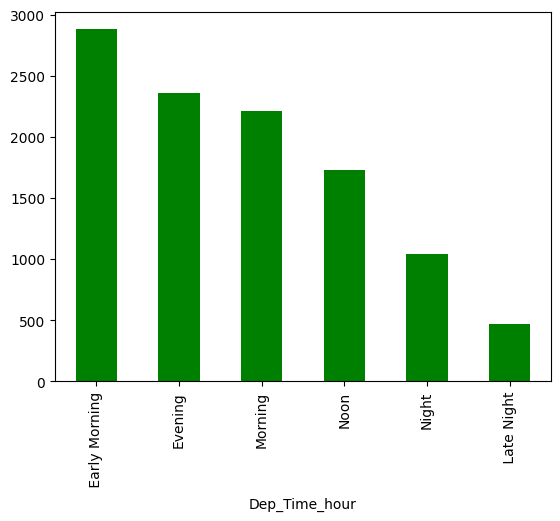

In [23]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().plot(kind="bar" , color= "Green")

In [24]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

In [25]:
## To use Plotly interactive plots directly with Pandas dataframes

import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

## plot is a command of Matplotlib which is more old-school. It creates static charts
## iplot is an interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots.

## Pre-process Duration Feature & extract meaningful features from it

In [26]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
        
    return x

In [27]:
data["Duration"] = data["Duration"].apply(preprocess_duration)
data["Duration"]

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [28]:
data["Duration_hours"] = data["Duration"].apply(lambda x : int(x.split(' ')[0][0:-1])) #x is a pointer to each row in Duration 

In [29]:
data["Duration_mins"] = data["Duration"].apply(lambda x : int(x.split(' ')[1][0:-1]))

## To Analyse whether Duration impacts Price or not

In [30]:
# convert duration into total minutes duration
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)
# data["Duration_in_minute"] = data["Duration_hour"]*60 + data["Duration_minute"]

In [31]:
data['Duration_total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_total_mins, Length: 10682, dtype: int64

Scatter plot tells the relationship between both the continuous feature. It is regression plot. 

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

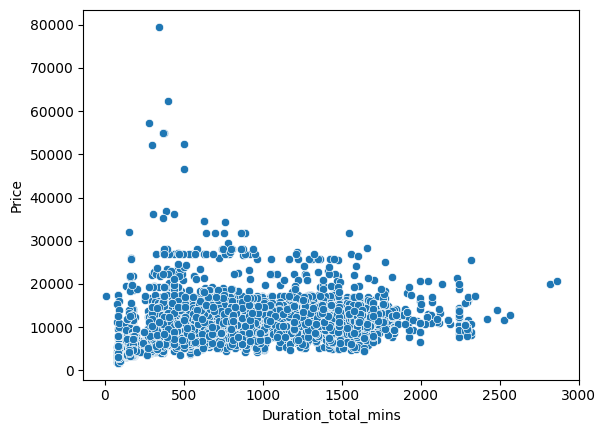

In [32]:
sns.scatterplot(x ="Duration_total_mins", y = "Price", data= data)

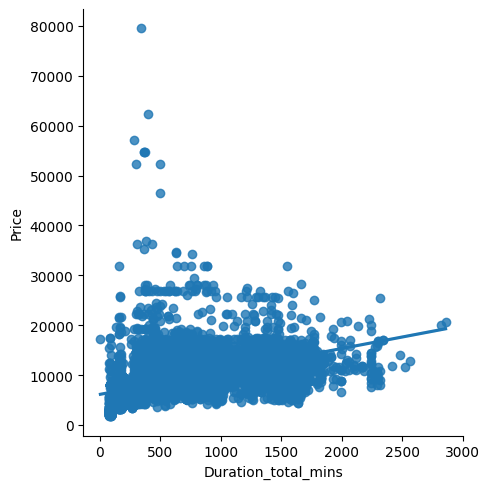

In [33]:
sns.lmplot(x ="Duration_total_mins", y = "Price", data= data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

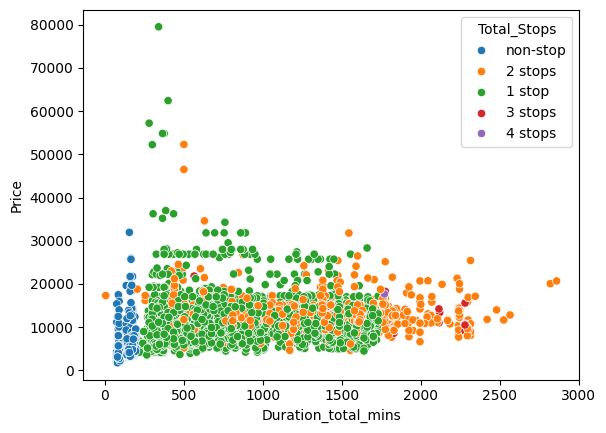

In [34]:
sns.scatterplot(x ="Duration_total_mins", y = "Price", hue ="Total_Stops", data= data)

## Which route Jet Airways is extremely used

In [35]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [36]:
#data[data['Airline']=='Jet Airways'].groupby("Route").count() - all flights by line
data[data['Airline']=='Jet Airways'].groupby("Route").size()

Route
BLR → BDQ → DEL            8
BLR → BOM → DEL          385
BLR → BOM → JDH → DEL      3
BLR → DEL                382
BLR → MAA → DEL           10
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → DEL → HYD            5
BOM → HYD                207
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
CCU → BOM → BLR          930
CCU → BOM → PNQ → BLR      4
CCU → DEL → BLR          300
CCU → GAU → BLR           22
DEL → AMD → BOM → COK    141
DEL → ATQ → BOM → COK     38
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → BOM → COK          875
DEL → CCU → BOM → COK      1
DEL → COK                 34
DEL → DED → BOM → COK      2
DEL → IDR → BOM → COK     86
DEL → IXC → BOM → COK     13
DEL → JAI → BOM → COK    207
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → MAA → BOM → COK     16
DEL → NAG → BOM → COK     61
DEL → UDR → BOM → COK      7
dtype: int64

In [37]:
data[data['Airline']=='Jet Airways'].groupby("Route").size().sort_values(ascending= False) #by defalt ascending is True

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

### Performing Airline vs Price Analysis.
        ie find price distribution & 5-point summary of each Airline..

In [38]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

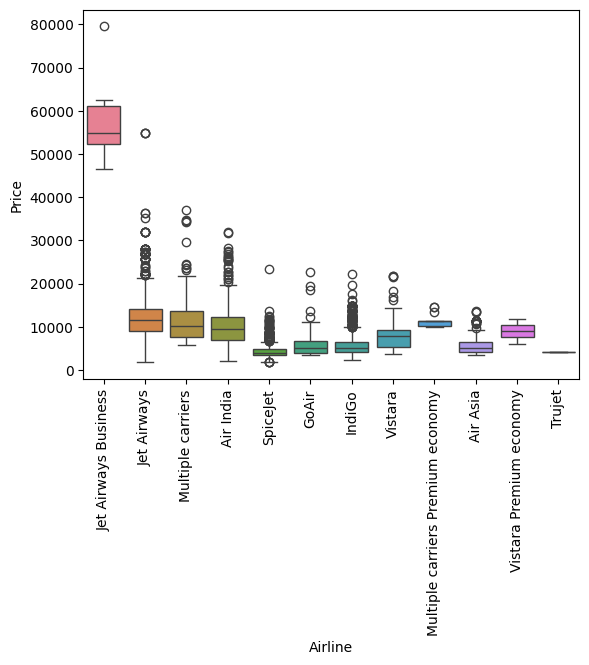

In [39]:
sns.boxplot(y='Price' , x='Airline', hue='Airline', data=data.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [40]:
'''

Conclusion--> From graph we can see that Jet Airways Business have the highest Price., 
              Apart from the first Airline almost all are having similar median

'''

'\n\nConclusion--> From graph we can see that Jet Airways Business have the highest Price., \n              Apart from the first Airline almost all are having similar median\n\n'

## Applying one-hot Encoding on data.

In [41]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325


In [42]:
'''

Categorical data refers to a data type that can be stored into groups/categories/labels 
Examples of categorical variables are  age group, educational level,blood type etc.. 


Numerical data refers to the data that is in the form of numbers
Numerical data has two categories: discrete data and continuous data


Discrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on. 
                In case of infinity, these numbers will keep going on...
                age of a fly : 8 , 9 day etc..
                
Continuous data : which is continuous in nature 
                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance
                  

'''

'\n\nCategorical data refers to a data type that can be stored into groups/categories/labels \nExamples of categorical variables are  age group, educational level,blood type etc.. \n\n\nNumerical data refers to the data that is in the form of numbers\nNumerical data has two categories: discrete data and continuous data\n\n\nDiscrete data : It basically takes countable numbers like 1, 2, 3, 4, 5, and so on. \n                In case of infinity, these numbers will keep going on...\n                age of a fly : 8 , 9 day etc..\n\nContinuous data : which is continuous in nature \n                  amount of sugar , 11.2 kg  , temp of a city  , your bank balance\n\n\n'

In [43]:
cat_col = [col for col in data.columns if data[col].dtype == "object"]

In [44]:
num_cal = [col for col in data.columns if data[col].dtype != "object"]

In [45]:
data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [46]:
data["Source"].apply(lambda x : 1 if x=="Banglore" else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [47]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

## To Perform target guided encoding on Data
    ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality
    lets use Target Guided Mean Encoding in such case to get rid of curse of dimensionality..

In [48]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


In [49]:
data['Airline'].nunique()

12

As we have 12 feathures, this would create a issue- curse of dimensionality. So as we have more subcategories, it's always good to use some optimized feature encoding technique. 

In [50]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [51]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [52]:
dict_airlines = { key:index for index, key in enumerate(airlines, 0)}

In [53]:
dict_airlines 

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [54]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [55]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [56]:
### now lets perform Target Guided Mean encoding on 'Destination' 
data['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

/var/folders/gj/73m1vm0d6n3cn1_g1z1pf62c0000gn/T/ipykernel_1486/3940364862.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [57]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [58]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [59]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [60]:
dict_dest = { key:index for index, key in enumerate(dest, 0)}

In [61]:
data['Destination'] = data['Destination'].map(dict_dest)

In [62]:
data['Destination'] 

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [63]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0


## Perform Label(Manual) Encoding on Data

In [64]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [65]:
# As this is case of Ordinal Categorical type we perform Label encoding from scratch !
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [66]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [67]:
data['Additional_Info'].value_counts()/len(data)*100

# Additional_Info contains almost 80% no_info,so we can drop this column

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [68]:
data.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins' , 'Source' , 'Journey_year'] , axis=1 , inplace=True)

In [69]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [70]:
data.drop(columns=['Duration'] , axis=1 , inplace=True)

## we can drop "Duration" feature as we have extracted "Duration hour" & "Duration Minute"..
data.drop(columns=['Route'] , axis=1 , inplace=True)

## we can drop Route as well bcz Route is directly related to Total stops & considering 2 same features doesnt make sense while building ML model..

In [71]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


## To Perform outlier detection !

In [72]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))

    # Top: density
    sns.histplot(df[col], ax=ax1, kde=True, stat="density")

    # Middle: horizontal boxplot
    sns.boxplot(x=df[col], ax=ax2, orient='h', palette='Set2')
    ax2.set_xlabel(col)
    ax2.set_ylabel("")

    # Bottom: histogram
    sns.histplot(df[col], ax=ax3)

    plt.tight_layout()

/var/folders/gj/73m1vm0d6n3cn1_g1z1pf62c0000gn/T/ipykernel_1486/1096564102.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




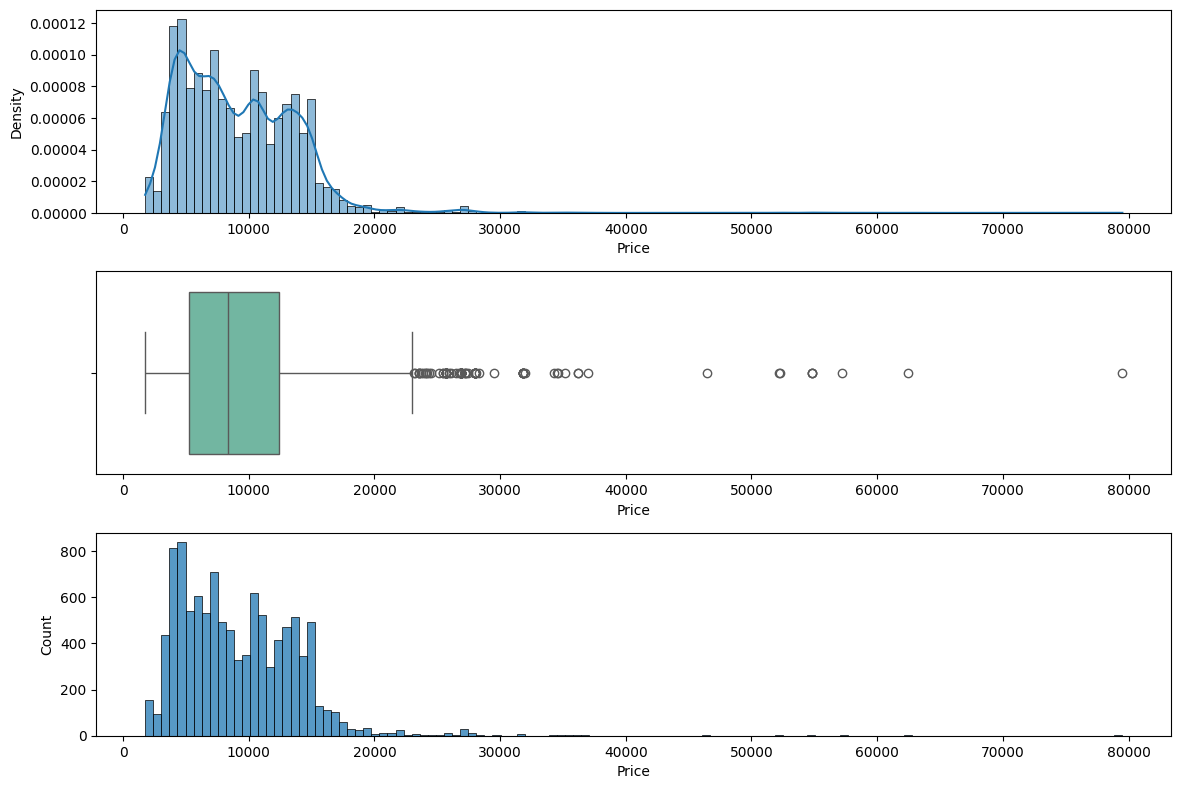

In [73]:
plot(data, "Price")

In [74]:
q1 = data["Price"].quantile(0.25)
q3 = data["Price"].quantile(0.75)

iqr = q3 - q1
maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [75]:
print(maximum)

23017.0


In [76]:
print(minimum)

-5367.0


In [77]:
print([price for price in data["Price"] if price > maximum or price < minimum ])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [78]:
data["Price"] = np.where(data["Price"]>=35000, data["Price"].median() , data["Price"])

/var/folders/gj/73m1vm0d6n3cn1_g1z1pf62c0000gn/T/ipykernel_1486/1096564102.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




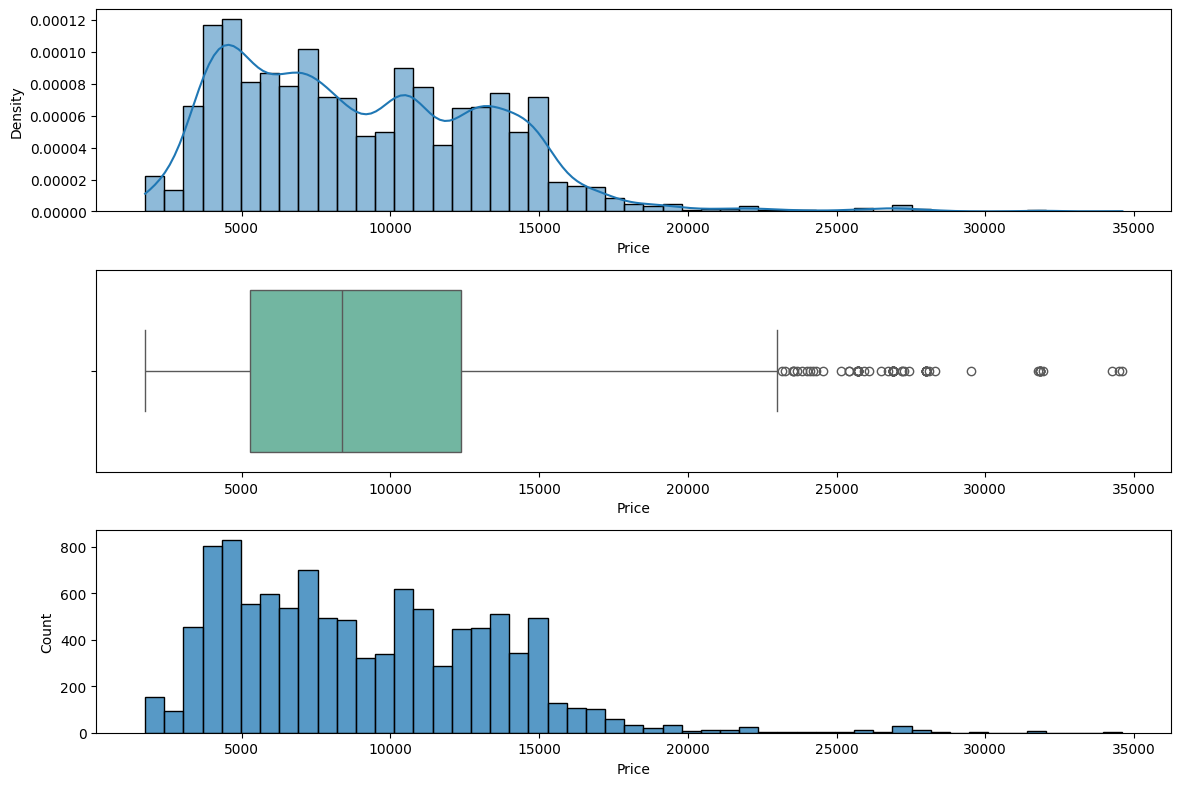

In [79]:
plot( data, "Price")

## To Perform feature selection

Mutual Information Approach (in terms of statistics it is a random variable). 
When mutaul information is 0, it means that two random variable are completely independeny and the moment they have the higher value of the mutual.

In [80]:
X = data.drop(["Price"], axis=1)
y = data["Price"]

In [81]:
# Ensure scikit-learn is installed in the kernel
%pip install -q --upgrade scikit-learn

# Verify installation
import sys
import importlib
try:
    sklearn = importlib.import_module('sklearn')
    print('scikit-learn version:', sklearn.__version__)
except Exception as e:
    print('Import failed:', e)
    print('Python executable:', sys.executable)

Note: you may need to restart the kernel to use updated packages.
scikit-learn version: 1.7.2


In [82]:
from sklearn.feature_selection import mutual_info_regression

In [83]:
imp = mutual_info_regression(X , y)

In [84]:
imp

array([1.33436706, 1.06522411, 0.79568887, 0.37437461, 0.62407552,
       0.91532934, 0.75651325, 1.1379014 , 0.90230074, 1.12132098,
       0.67851131, 0.38838032, 0.45991195, 0.51358295, 0.13395956,
       0.19791731])

In [85]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [86]:
imp_df.columns = ['importance']

In [87]:
imp_df

,importance
Airline,1.334367
Destination,1.065224
Total_Stops,0.795689
Journey_day,0.374375
Journey_month,0.624076
Dep_Time_hour,0.915329
Dep_Time_minute,0.756513
Arrival_Time_hour,1.137901
Arrival_Time_minute,0.902301
Duration_hours,1.121321


In [88]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Airline,1.334367
Arrival_Time_hour,1.137901
Duration_hours,1.121321
Destination,1.065224
Dep_Time_hour,0.915329
Arrival_Time_minute,0.902301
Total_Stops,0.795689
Dep_Time_minute,0.756513
Duration_mins,0.678511
Journey_month,0.624076


# To Build ML model

In [89]:
from sklearn.model_selection import train_test_split

In [ ]:
# Ensure X and y are defined
if 'X' not in globals() or 'y' not in globals():
    X = data.drop(["Price"], axis=1)
    y = data["Price"]

#split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

#### what we often do in modelling:

    a..Initially ,lets build basic random model.
    b..then later-on , we will try to improve this model using some parameters..
    c..Then we will try to improve it..
    d..Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params..

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
ml_model = RandomForestRegressor()

In [93]:
ml_model.fit(X_train , y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [94]:
y_pred = ml_model.predict(X_test)
y_pred

array([16833.91,  5445.8 ,  8822.74, ...,  3567.33,  6242.62,  6817.32],
      shape=(2671,))

In [95]:
from sklearn import metrics

In [96]:
metrics.r2_score(y_test , y_pred)

0.8122442622148289

## To Save The Model 

#### lets try to dump ml model using pickle or joblib..
    advantage of dumping--
    imagine in future we have new data & lets say we have to predict price on this huge data

    then to do prediction on this new data , we can use this pre-trained model what we have dumped..


In [115]:
import pickle

# Save the trained model to a file
with open('rf_random.pkl', 'wb') as file:
	pickle.dump(ml_model, file)

In [116]:
model = open(r'/Users/anastasiiakoptsova/Coding_Folder/rf_random.pkl' , 'rb')

In [118]:
with open('rf_random.pkl', 'rb') as f:
    forest = pickle.load(f)

In [119]:
y_pred2 = forest.predict(X_test)

In [120]:
metrics.r2_score(y_test , y_pred2)

0.8122442622148289

## To automate ml pipeline & How to define your Evaluation metric.

To make our own metric.

In [125]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [126]:
mape(y_test , y_pred)

np.float64(13.101331590731577)

To automate ml pipeline.

In [127]:
'''

   We will automate all the stuffs..
    let say ,I will just pass ml algorithm & i get several results like--
    
    Training score, predictions, r2_score, mse, mae, rmse, mape,distribution of error


'''

'\n\n   We will automate all the stuffs..\n    let say ,I will just pass ml algorithm & i get several results like--\n\n    Training score, predictions, r2_score, mse, mae, rmse, mape,distribution of error\n\n\n'

In [128]:
from sklearn import metrics

In [133]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.histplot(y_test - y_predection, kde=True, stat="density")

Training score : 0.9516026906848335
predictions are : [16765.43  5356.41  8788.58 ...  3487.1   6164.07  6856.43]


r2 score : 0.8091247598761044
MAE : 1184.2828685043999
MSE : 3715882.760774848
RMSE : 1927.6625121568475
MAPE : 13.27349117827288


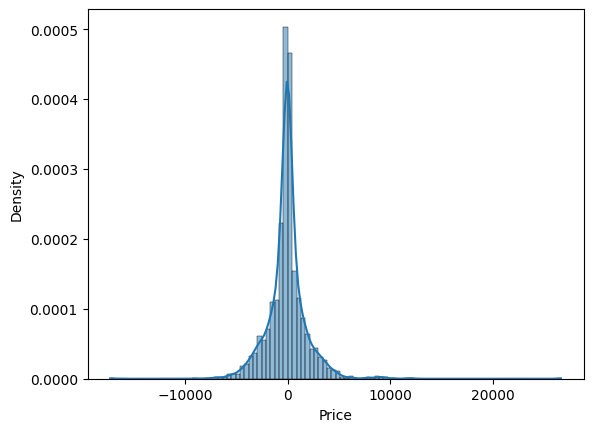

In [134]:
predict(RandomForestRegressor())

In [135]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predictions are : [16840.  4959.  8085. ...  3419.  5797.  6442.]


r2 score : 0.6768232591048169
MAE : 1412.432834144515
MSE : 6291475.41292587
RMSE : 2508.281366379352
MAPE : 15.618514458321028


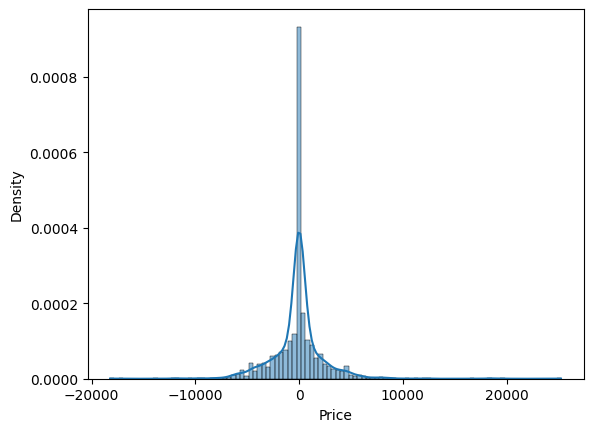

In [136]:
predict(DecisionTreeRegressor())

## How to hypertune ml model

In [137]:
## how to select which ML algo we should apply for
## ans is use Multiple Algos,then go for Hyper-parameter Optimization,then for Cross Validation then go for various metrics 
## & based on domain expertise knowledge Then I can say ya this model perfoms best

In [138]:
from sklearn.model_selection import RandomizedSearchCV

In [139]:
### initialise your estimator
reg_rf = RandomForestRegressor()

In [140]:
np.linspace(start =100 , stop=1200 , num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [141]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]

In [ ]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split 
}

In [143]:
random_grid 

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [145]:
# Define searching. Random search of parameters, using 3 fold cross validation
# search across 576 different combinations


rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [146]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Python(12727) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12728) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12729) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12730) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12731) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12732) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(12732) Malloc

[CV] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=1200; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=1200; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_split=10, n_estimators=1200; total time=   0.0s
[CV] END max_depth=21, max_features=auto, min_samples_split=10, n_estimators=760; total time=   0.0s
[CV] END max_depth=21, max_features=auto, min_samples_split=10, n_estimators=760; total time=   0.0s
[CV] END max_depth=21, max_features=auto, min_samples_split=10, n_estimators=760; total time=   0.0s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=10, n_estimators=320; total time=   3.0s
[CV] END max_depth=21, max_features=sqrt, min_samples_split=10, n_estimators=320; total time=   3.0s
[CV] END max_depth=30, max_features=auto, min_samples_split=5, n_estimators=320; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_split=5, n_estimators=320; total time=

/Users/anastasiiakoptsova/Coding_Folder/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning:


12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/anastasiiakoptsova/Coding_Folder/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anastasiiakoptsova/Coding_Folder/.venv/lib/python3.13/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File

,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [5, 13, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [5, 10, ...], 'n_estimators': [100, 320, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [147]:
rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 30}

In [148]:
rf_random.best_estimator_

,n_estimators,540
,criterion,'squared_error'
,max_depth,30
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [149]:
rf_random.best_score_

np.float64(0.8039433437399168)